<a href="https://colab.research.google.com/github/puneethegde72/Image-Identification/blob/main/Galaxy_group_project_(group_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

In [ ]:
# Extract the dataset from the zip file
with zipfile.ZipFile('/content/Group_Project_Data 2.zip', 'r') as zip_ref:
    zip_ref.extractall('Group_Project_Data')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./64)

test_datagen = ImageDataGenerator(rescale=1./64)

In [ ]:
train_dir = '/content/Group_Project_Data/Group_Project_Data/Valid'
test_dir = '/content/Group_Project_Data/Group_Project_Data/Train'

In [ ]:
valid = train_datagen.flow_from_directory(train_dir,
                                          target_size=(64, 64),
                                          batch_size=64,
                                          color_mode='grayscale',
                                          class_mode='binary')

test = test_datagen.flow_from_directory(test_dir,
                                        target_size=(64, 64),
                                        batch_size=64,
                                        color_mode='grayscale',
                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
# model with regularization
model_1 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])



In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)


In [ ]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model_1.fit(valid,
                    steps_per_epoch=valid.samples // valid.batch_size,
                    epochs=50,
                    validation_data=test,
                    validation_steps=test.samples // test.batch_size, callbacks=[early_stop, reduce_lr])

Epoch 1/50
31/31 [==============================] - 15s 127ms/step - loss: 4.2732 - accuracy: 0.7856 - val_loss: 0.8686 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 4s 127ms/step - loss: 0.5532 - accuracy: 0.9902 - val_loss: 0.3852 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 3s 113ms/step - loss: 0.3416 - accuracy: 0.9917 - val_loss: 0.2770 - val_accuracy: 0.9961 - lr: 0.0010
Epoch 4/50
31/31 [==============================] - 3s 100ms/step - loss: 0.2546 - accuracy: 0.9954 - val_loss: 0.3161 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 5/50
31/31 [==============================] - 4s 123ms/step - loss: 0.2642 - accuracy: 0.9830 - val_loss: 0.2251 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 6/50
31/31 [==============================] - 3s 114ms/step - loss: 0.2099 - accuracy: 0.9938 - val_loss: 0.1855 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 7/50
31/31 [==============================] - 3s 113ms/step - l

Text(0.5, 1.0, 'Training and Validation Loss')

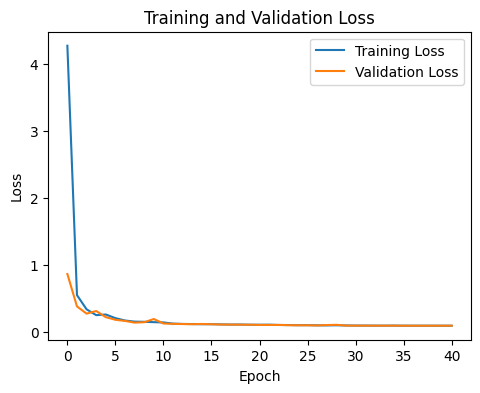

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

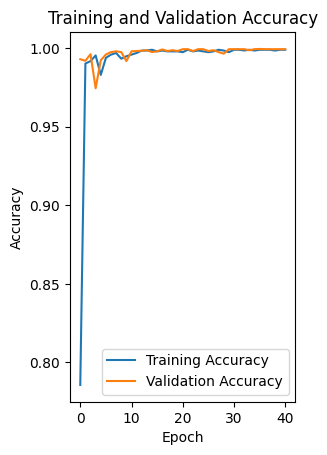

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
test_images, test_labels = next(test)
test_pred = model_1.predict(test_images)

2/2 [==============================] - 0s 6ms/step


In [ ]:
fake_indices = np.where(test_pred < 0.5)[0]
real_indices = np.where(test_pred >= 0.5)[0]

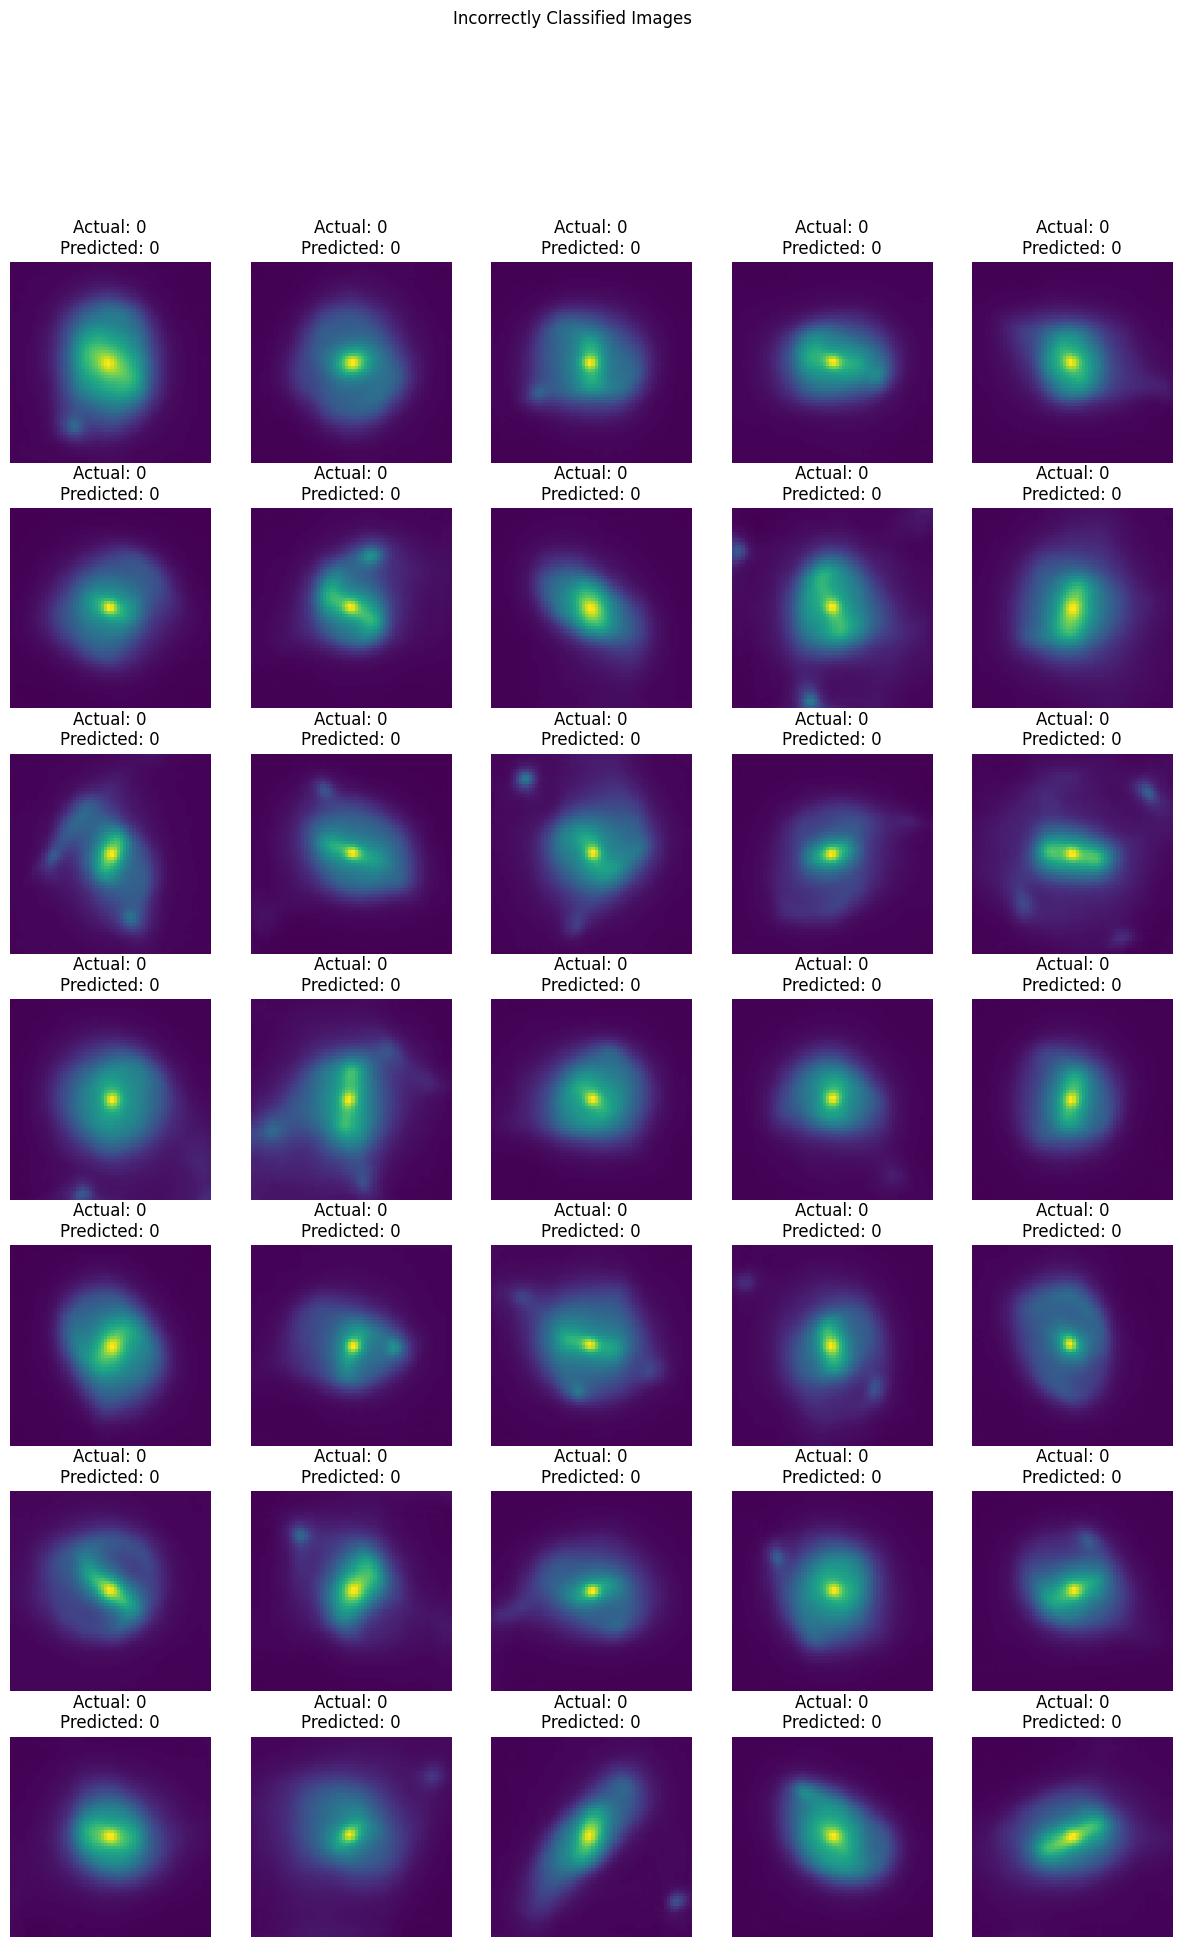

In [ ]:
# plot fake images
plt.figure(figsize=(15, 25))
for i, idx in enumerate(fake_indices[:50]):
    plt.subplot(8, 5, i+1)
    plt.imshow(test_images[idx])
    plt.title('Actual: {:.0f}\nPredicted: {:.0f}'.format(test_labels[idx], test_pred[idx, 0]))
    plt.axis("off")
plt.suptitle('Incorrectly Classified Images')
plt.show()

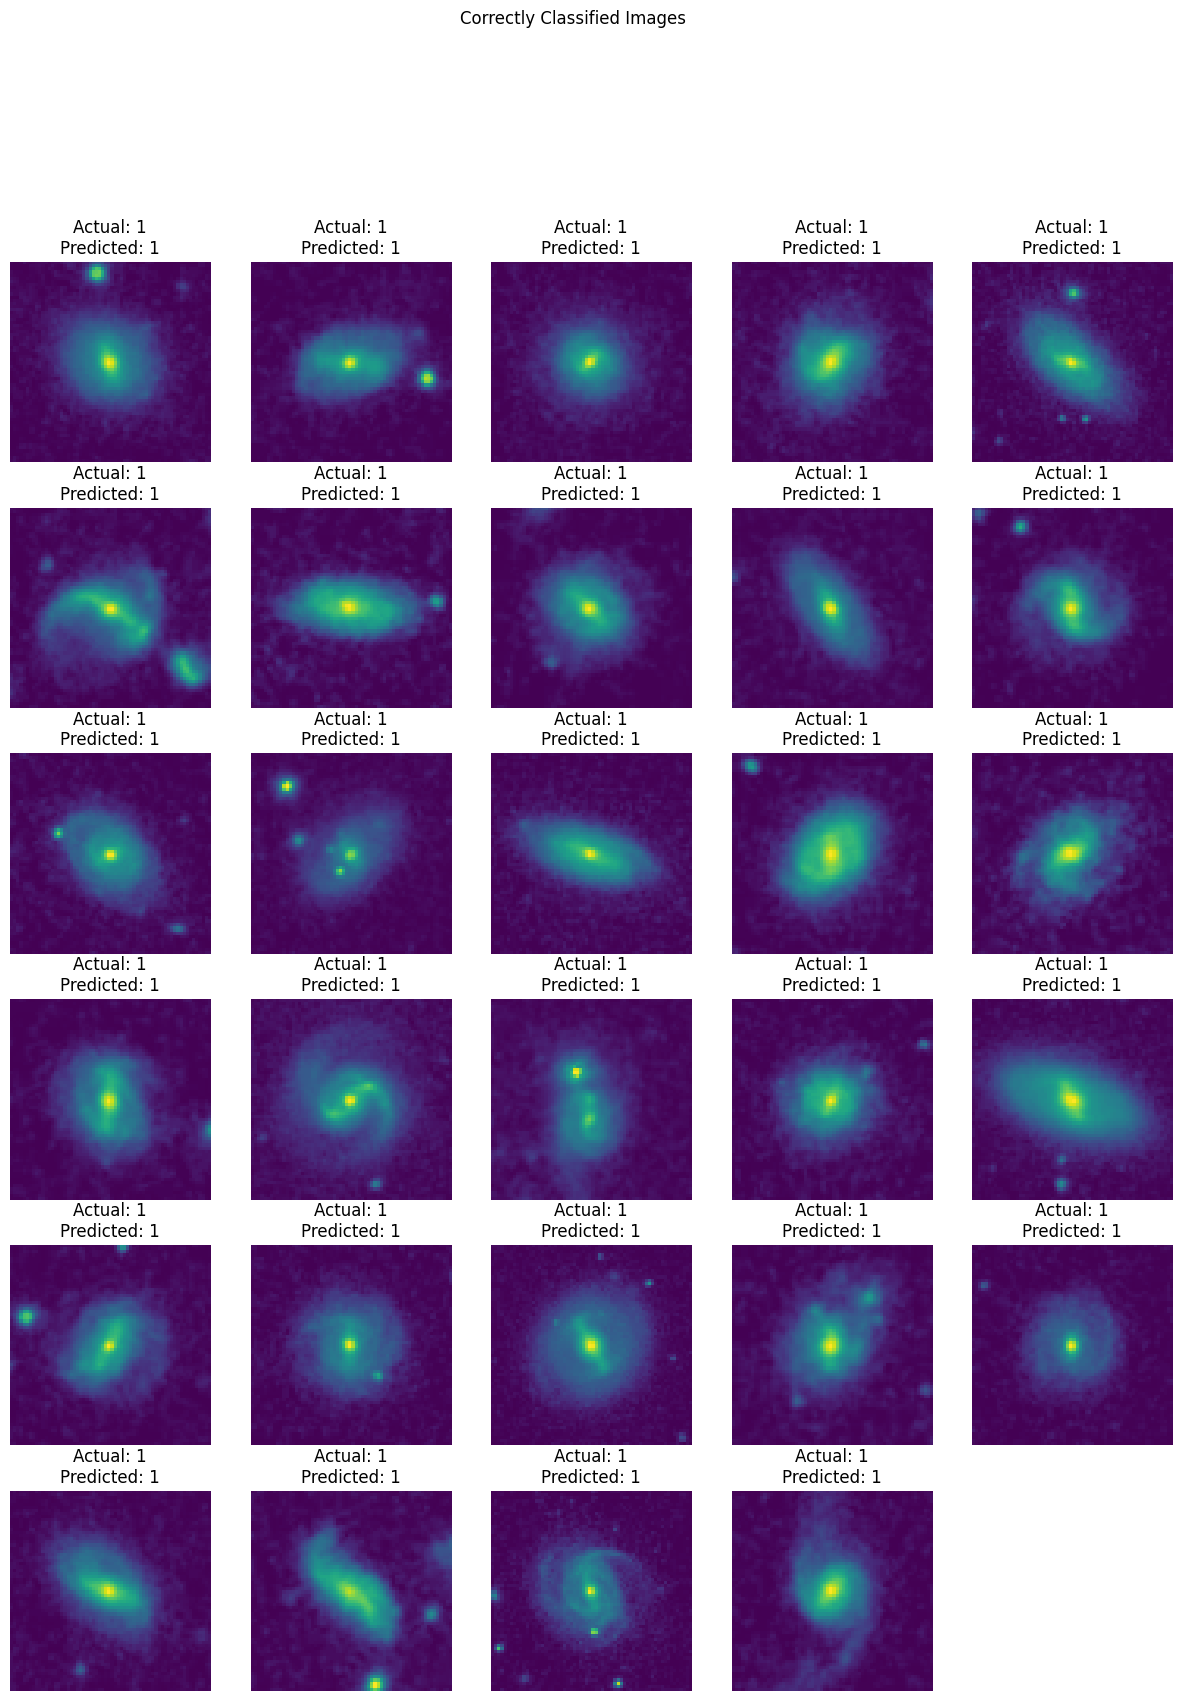

In [ ]:
plt.figure(figsize=(15, 25))
for i, idx in enumerate(real_indices[:40]):
    plt.subplot(8, 5, i+1)
    plt.imshow(test_images[idx])
    plt.title('Actual: {:.0f}\nPredicted: {:.0f}'.format(test_labels[idx], test_pred[idx, 0]))
    plt.axis("off")
plt.suptitle('Correctly Classified Images')
plt.show()